In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split,  KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import shap
sns.set_theme(style="darkgrid")

In [2]:
df=pd.read_csv('../Datasets/Hotel_booking.csv')
df.head()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,27,1,7,0,0,2,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,27,1,7,0,0,2,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,27,1,7,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,27,1,7,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,14,27,1,7,0,2,2,0,0,...,0,0,0,1,0,0,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     377 non-null    int64  
 1   lead_time                       377 non-null    int64  
 2   arrival_date_week_number        377 non-null    int64  
 3   arrival_date_day_of_month       377 non-null    int64  
 4   arrival_date_month              377 non-null    int64  
 5   stays_in_weekend_nights         377 non-null    int64  
 6   stays_in_week_nights            377 non-null    int64  
 7   adults                          377 non-null    int64  
 8   children                        377 non-null    int64  
 9   babies                          377 non-null    int64  
 10  is_repeated_guest               377 non-null    int64  
 11  previous_cancellations          377 non-null    int64  
 12  previous_bookings_not_canceled  377 

In [4]:
df.columns

Index(['is_canceled', 'lead_time', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'arrival_date_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'required_car_parking_spaces',
       'total_of_special_requests', 'avg_daily_rate', 'booked_by_company',
       'booked_by_agent', 'hotel_City', 'hotel_Resort', 'meal_BB', 'meal_FB',
       'meal_HB', 'meal_No_meal', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline_TA_TO', 'market_segment_Online_TA',
       'market_segment_Undefined', 'distribution_channel_Corporate',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA_TO', 'distribution_channel_Undefined',
       'reserved_room_type_A', 'reserved_room_type_B

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
count,377.000000,377.000000,377.000000,377.000000,377.0,377.000000,377.000000,377.000000,377.000000,377.000000,...,377.000000,377.000000,377.000000,377.0,377.0,377.0,377.000000,377.0,377.000000,377.000000
mean,0.201592,64.549072,27.838196,6.891247,7.0,1.419098,3.546419,2.013263,0.190981,0.034483,...,0.061008,0.029178,0.002653,1.0,0.0,0.0,0.098143,0.0,0.864721,0.037135
std,0.401722,69.419465,0.712969,3.952693,0.0,1.150604,2.338074,0.382231,0.718763,0.196727,...,0.239663,0.168528,0.051503,0.0,0.0,0.0,0.297904,0.0,0.342475,0.189345
min,0.000000,0.000000,27.000000,1.000000,7.0,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
25%,0.000000,21.000000,27.000000,3.000000,7.0,0.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.0,1.000000,0.000000
50%,0.000000,54.000000,28.000000,6.000000,7.0,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.0,1.000000,0.000000
75%,0.000000,92.000000,28.000000,11.000000,7.0,2.000000,5.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.0,1.000000,0.000000
max,1.000000,737.000000,29.000000,13.000000,7.0,6.000000,15.000000,4.000000,10.000000,2.000000,...,1.000000,1.000000,1.000000,1.0,0.0,0.0,1.000000,0.0,1.000000,1.000000


In [6]:
df.children.value_counts()

0     337
2      23
1      16
10      1
Name: children, dtype: int64

In [7]:
df.adults.value_counts()

2    328
3     24
1     23
4      2
Name: adults, dtype: int64

In [8]:
df.babies.value_counts()

0    365
1     11
2      1
Name: babies, dtype: int64

<h1>Which family sizes are associated with the highest cancellation rate?</h1>

<h3> the relationship between the number chidren  and  booking  cancellation rate  </h3>

<AxesSubplot:xlabel='is_canceled', ylabel='children'>

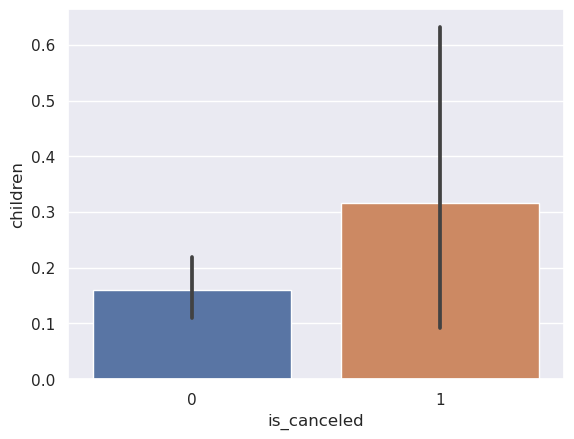

In [9]:
sns.barplot(data=df, x='is_canceled',y='children')

<h3> the relationship between the number babies  and  booking  cancellation rate  </h3>

<AxesSubplot:xlabel='is_canceled', ylabel='babies'>

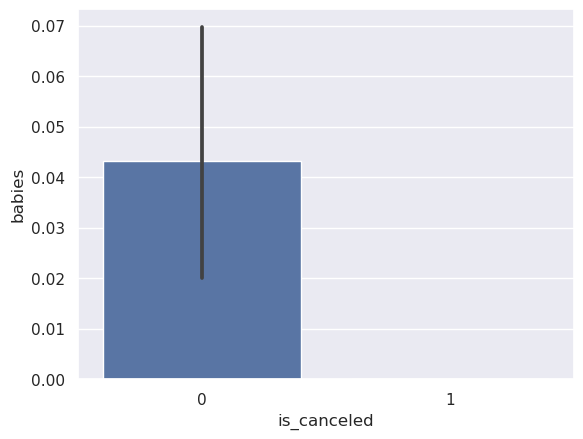

In [10]:
sns.barplot(data=df, x='is_canceled',y='babies')

<h3> the relationship between the number chidren  and  booking  cancellation rate  </h3>

<AxesSubplot:xlabel='is_canceled', ylabel='adults'>

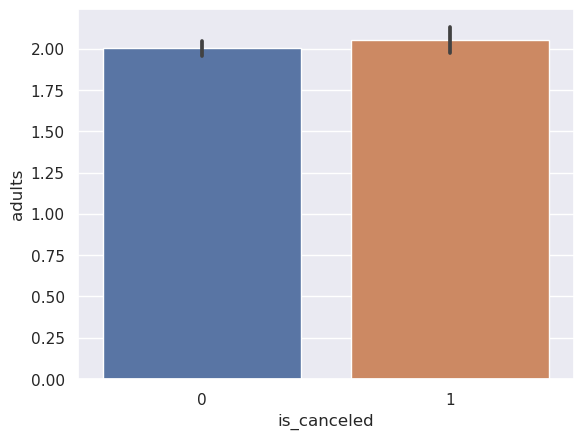

In [11]:
sns.barplot(data=df, x='is_canceled',y='adults')

<h3>  acconding to the graph customers who book for babies will most likely cancel their booking   </h3>

<h1>Create a plot that visualizes the cancellation rates of different times of the year</h1>

In [12]:
df.arrival_date_month.value_counts()

7    377
Name: arrival_date_month, dtype: int64

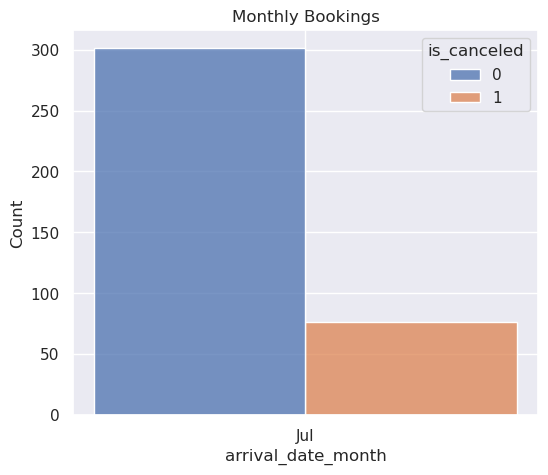

In [13]:
fig, ax = plt.subplots(figsize=(6,5))
plt.title('Monthly Bookings')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
#sns.histplot(df['arrival_date_month'],kde=True)
sns.histplot(data=df, x="arrival_date_month", hue="is_canceled",multiple="dodge",binwidth=0.5,discrete=True)
plt.show()

<h4>looks like only the month july has activity of booking</h4>

<h1>Are bookings with longer lead times more likely to result in a cancellation</h1>

In [47]:
df.lead_time.value_counts()

-0.931077    19
-0.916652    10
-0.440650     9
-0.195436     9
-0.815682     8
             ..
 2.790399     1
 0.006504     1
 0.035353     1
 3.280826     1
-0.382952     1
Name: lead_time, Length: 121, dtype: int64

In [15]:
def filter(x):
    if x<=1:
        return 'new'
    elif x>1 and x<8:
        return 'week_ago'
    elif x>=8 and x<=30:
        return 'month ago'
    elif x>30 and x<=60:
        return '2 month ago'
    if x>60:
        return 'very long time'
    
    

In [16]:
df['LeadTime']=df['lead_time'].apply(filter)

<AxesSubplot:xlabel='LeadTime', ylabel='Count'>

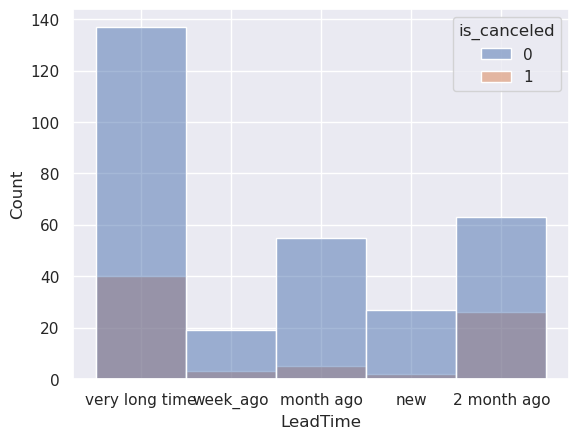

In [17]:
sns.histplot(data=df, x='LeadTime',hue='is_canceled')

<h4>From the histogram we can learn when the lead time is longer the cancellation rate is bigger but the booking rate is much higer.</h4>

<h1>Data Preproccesing<h1>

In [18]:
df.isna().sum()

is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
arrival_date_month                0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
required_car_parking_spaces       0
total_of_special_requests         0
avg_daily_rate                    0
booked_by_company                 0
booked_by_agent                   0
hotel_City                        0
hotel_Resort                      0
meal_BB                           0
meal_FB                           0
meal_HB                           0
meal_No_meal                      0
market_segment_Aviation           0
market_segment_Complementary      0
market_segment_Corporate          0
market_segment_Direct       

In [19]:
df.isna().sum()

is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
arrival_date_month                0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
required_car_parking_spaces       0
total_of_special_requests         0
avg_daily_rate                    0
booked_by_company                 0
booked_by_agent                   0
hotel_City                        0
hotel_Resort                      0
meal_BB                           0
meal_FB                           0
meal_HB                           0
meal_No_meal                      0
market_segment_Aviation           0
market_segment_Complementary      0
market_segment_Corporate          0
market_segment_Direct       

In [20]:
df=df.drop(['arrival_date_week_number','arrival_date_day_of_month', 'arrival_date_month', 'required_car_parking_spaces','total_of_special_requests','avg_daily_rate','market_segment_Aviation', 'market_segment_Complementary','market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups','market_segment_Offline_TA_TO','market_segment_Online_TA','market_segment_Undefined','distribution_channel_Corporate','distribution_channel_Direct','distribution_channel_GDS','distribution_channel_TA_TO', 'distribution_channel_Undefined'], axis=1)

In [33]:
df=df.drop(['LeadTime'], axis=1)

In [34]:
df.columns

Index(['is_canceled', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booked_by_company',
       'booked_by_agent', 'hotel_City', 'hotel_Resort', 'meal_BB', 'meal_FB',
       'meal_HB', 'meal_No_meal', 'reserved_room_type_A',
       'reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_D',
       'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G',
       'reserved_room_type_H', 'reserved_room_type_L',
       'deposit_type_No_Deposit', 'deposit_type_Non_Refund',
       'deposit_type_Refundable', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'lead_time', 'adults', 'children',
       'babies'],
      dtype='object')

In [35]:
df.head()

,is_canceled,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booked_by_company,booked_by_agent,hotel_City,hotel_Resort,...,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,lead_time,adults,children,babies
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,4.002042,-0.034744,-0.266062,-0.175515
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,9.699651,-0.034744,-0.266062,-0.175515
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,-0.830106,-2.654442,-0.266062,-0.175515
3,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,1,0,-0.743561,-2.654442,-0.266062,-0.175515
4,0,0,2,0,0,0,0,1,0,1,...,0,0,0,0,1,0,-0.729136,-0.034744,-0.266062,-0.175515


In [36]:
to_scale=['lead_time', 'adults', 'children', 'babies']

In [37]:
std=StandardScaler()
scaled=std.fit_transform(df[to_scale])
scaled=pd.DataFrame(scaled,columns=to_scale)

In [38]:
df=df.drop(columns=to_scale, axis=1)
df=df.merge(scaled,left_index=True, right_index=True, how='left')
df.head()

,is_canceled,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booked_by_company,booked_by_agent,hotel_City,hotel_Resort,...,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,lead_time,adults,children,babies
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,4.002042,-0.034744,-0.266062,-0.175515
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,9.699651,-0.034744,-0.266062,-0.175515
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,-0.830106,-2.654442,-0.266062,-0.175515
3,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,1,0,-0.743561,-2.654442,-0.266062,-0.175515
4,0,0,2,0,0,0,0,1,0,1,...,0,0,0,0,1,0,-0.729136,-0.034744,-0.266062,-0.175515


In [39]:
X=df.drop(['is_canceled'], axis=1)

In [40]:
X.columns

Index(['stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booked_by_company', 'booked_by_agent', 'hotel_City', 'hotel_Resort',
       'meal_BB', 'meal_FB', 'meal_HB', 'meal_No_meal', 'reserved_room_type_A',
       'reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_D',
       'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G',
       'reserved_room_type_H', 'reserved_room_type_L',
       'deposit_type_No_Deposit', 'deposit_type_Non_Refund',
       'deposit_type_Refundable', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'lead_time', 'adults', 'children',
       'babies'],
      dtype='object')

In [41]:
y=df.is_canceled.values

In [42]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

In [43]:
models=[]
lg=LogisticRegression()
KNN=KNeighborsClassifier()
Dst=DecisionTreeClassifier()
RF=RandomForestClassifier()
GB=GradientBoostingClassifier()
models.append(lg)
models.append( KNN)
models.append( Dst)
models.append( RF)
models.append( GB)

In [44]:
for model in models:
    clf=model.fit(X_train, y_train)
    predictions=model.predict(X_test)
    print(classification_report(y_test, predictions) , model)
    print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88        91
           1       0.00      0.00      0.00        23

    accuracy                           0.79       114
   macro avg       0.40      0.49      0.44       114
weighted avg       0.64      0.79      0.70       114
 LogisticRegression()
[[90  1]
 [23  0]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        91
           1       0.38      0.22      0.28        23

    accuracy                           0.77       114
   macro avg       0.60      0.56      0.57       114
weighted avg       0.73      0.77      0.75       114
 KNeighborsClassifier()
[[83  8]
 [18  5]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        91
           1       0.59      0.43      0.50        23

    accuracy                           0.82       114
   macro avg       0.73      0.68      0.70   

<h4>from the models above we can see DecisionTreeClassifier has the better accuracy and precision </h4>

In [ ]:
Dst.fit(X_train, y_train)

In [45]:
importances = Dst.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = df.columns[1:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) lead_time                      0.365333
 2) stays_in_week_nights           0.140852
 3) reserved_room_type_E           0.104585
 4) children                       0.085872
 5) stays_in_weekend_nights        0.073093
 6) reserved_room_type_D           0.048644
 7) meal_HB                        0.038887
 8) reserved_room_type_A           0.031157
 9) customer_type_Transient        0.029317
10) adults                         0.023963
11) reserved_room_type_G           0.020676
12) meal_BB                        0.018904
13) reserved_room_type_H           0.008214
14) booked_by_company              0.006716
15) babies                         0.003787
16) reserved_room_type_F           0.000000
17) customer_type_Transient-Party  0.000000
18) deposit_type_Refundable        0.000000
19) is_repeated_guest              0.000000
20) previous_cancellations         0.000000
21) previous_bookings_not_canceled 0.000000
22) deposit_type_Non_Refund        0.000000
23) booked_by_agent             

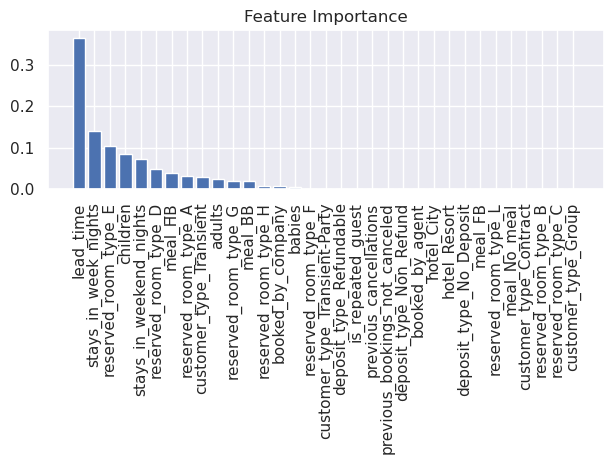

In [46]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

<h4>The most influencial variables related with booking cancletion are: lead time - stays_in_week_nights - reserved_room_type_E  - children - stays_in_weekend_nights</h4>

***Actions that could optimize their booking service and anticipate when cancellations will occur***
* Bookings with longer lead times more likely to result in a cancellation
* Making sure all resrved rooms are comfortable and stardard and well accomodating for children 